# Car Price Prediction

### Importer les librairies nécessaires

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense

### Importer le dataset

In [95]:
file = "Car_Purchasing_Data.csv"

car_df = pd.read_csv(file, encoding='ISO-8859-1')
car_df.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


### Nettoyer le dataset

In [96]:
# Afficher les colonnes du dataset
car_df.columns

Index(['Customer Name', 'Customer e-mail', 'Country', 'Gender', 'Age',
       'Annual Salary', 'Credit Card Debt', 'Net Worth',
       'Car Purchase Amount'],
      dtype='object')

In [97]:
# Supprimer les colonnes inutiles
car = car_df.drop(['Customer Name','Customer e-mail', 'Country'], axis = 1)
car.head()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [98]:
# Statistiques sommaires du dataset
car.describe()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


### Definir X et y

In [99]:
# Definir X
X = car.drop(["Car Purchase Amount"], axis = 1)
X.head()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,0,41.851720,62812.09301,11609.380910,238961.2505
1,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,43.152897,53798.55112,11160.355060,638467.1773
3,1,58.271369,79370.03798,14426.164850,548599.0524
4,1,57.313749,59729.15130,5358.712177,560304.0671


In [100]:
# Definir y
y = car[["Car Purchase Amount"]]
y.head()

,Car Purchase Amount
0,35321.45877
1,45115.52566
2,42925.70921
3,67422.36313
4,55915.46248


### Splitter le dataset

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

### Normaliser les données

In [102]:
scale = MinMaxScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

y = y.values.reshape(y.shape[0], 1)
y_train_scaled = scale.fit_transform(y_train)

### Construire le modele

In [103]:
model = Sequential()
model.add(Dense(100, input_dim = X_train_scaled.shape[1], activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 100)               600       
                                                                 
 dense_16 (Dense)            (None, 100)               10100     
                                                                 
 dense_17 (Dense)            (None, 1)                 101       
                                                                 
Total params: 10,801
Trainable params: 10,801
Non-trainable params: 0
_________________________________________________________________


### Optimisation du réseau neuronal

In [104]:
model.compile(optimizer='adam', loss = 'mean_squared_error', metrics = ["accuracy"])

In [105]:
epochs_history = model.fit(X_train_scaled, y_train_scaled, epochs = 60, validation_split = 0.2, batch_size = 60)

Epoch 1/60
6/6 [==============================] - 1s 40ms/step - loss: 0.2311 - accuracy: 0.0031 - val_loss: 0.0812 - val_accuracy: 0.0000e+00
Epoch 2/60
6/6 [==============================] - 0s 10ms/step - loss: 0.0381 - accuracy: 0.0063 - val_loss: 0.0118 - val_accuracy: 0.0000e+00
Epoch 3/60
6/6 [==============================] - 0s 9ms/step - loss: 0.0261 - accuracy: 0.0063 - val_loss: 0.0246 - val_accuracy: 0.0000e+00
Epoch 4/60
6/6 [==============================] - 0s 9ms/step - loss: 0.0215 - accuracy: 0.0063 - val_loss: 0.0086 - val_accuracy: 0.0000e+00
Epoch 5/60
6/6 [==============================] - 0s 10ms/step - loss: 0.0101 - accuracy: 0.0063 - val_loss: 0.0103 - val_accuracy: 0.0000e+00
Epoch 6/60
6/6 [==============================] - 0s 8ms/step - loss: 0.0111 - accuracy: 0.0063 - val_loss: 0.0098 - val_accuracy: 0.0000e+00
Epoch 7/60
6/6 [==============================] - 0s 8ms/step - loss: 0.0090 - accuracy: 0.0063 - val_loss: 0.0070 - val_accuracy: 0.0000e+00
Epo

6/6 [==============================] - 0s 9ms/step - loss: 2.3506e-05 - accuracy: 0.0063 - val_loss: 3.6432e-05 - val_accuracy: 0.0000e+00
Epoch 57/60
6/6 [==============================] - 0s 6ms/step - loss: 2.1870e-05 - accuracy: 0.0063 - val_loss: 3.6620e-05 - val_accuracy: 0.0000e+00
Epoch 58/60
6/6 [==============================] - 0s 7ms/step - loss: 2.0365e-05 - accuracy: 0.0063 - val_loss: 3.4851e-05 - val_accuracy: 0.0000e+00
Epoch 59/60
6/6 [==============================] - 0s 6ms/step - loss: 2.1787e-05 - accuracy: 0.0063 - val_loss: 3.3179e-05 - val_accuracy: 0.0000e+00
Epoch 60/60
6/6 [==============================] - 0s 6ms/step - loss: 2.0209e-05 - accuracy: 0.0063 - val_loss: 3.5214e-05 - val_accuracy: 0.0000e+00


In [106]:
# Evaluation du modèle
epochs_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Tracer le modèle

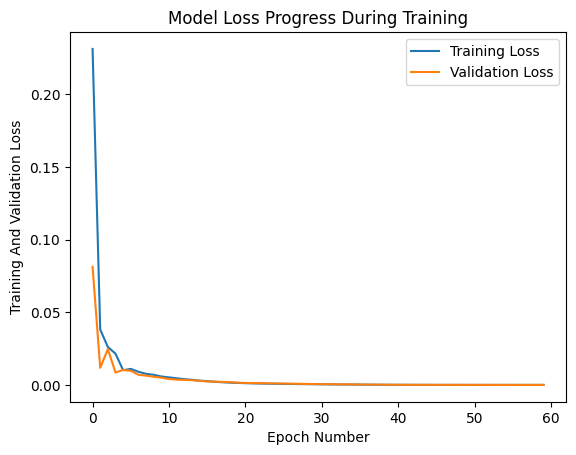

In [107]:
plt.plot(epochs_history.history["loss"])
plt.plot(epochs_history.history["val_loss"])
plt.title("Model Loss Progress During Training")
plt.xlabel("Epoch Number")
plt.ylabel("Training And Validation Loss")
plt.legend(["Training Loss","Validation Loss"])
plt.show()

### R2 Score

In [108]:
y_predict = model.predict(X_test_scaled)
y_predict_origin = scale.inverse_transform(y_predict)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict_origin)), '.3f'))
MSE = mean_squared_error(y_test, y_predict_origin)
MAE = mean_absolute_error(y_test, y_predict_origin)
R2 = r2_score(y_test, y_predict_origin)

print('RMSE = ', RMSE)
print('MSE = ', MSE)
print('MAE = ', MAE)
print('R2 = ', R2)

4/4 [==============================] - 0s 0s/step
RMSE =  631.335
MSE =  398583.4082166455
MAE =  392.4235001625
R2 =  0.9962813125416387


### Tester le modèle

In [109]:
data = np.array([[1, 23, 65000, 15000, 28000]])
prediction = model.predict(data)

1/1 [==============================] - 0s 47ms/step


In [110]:
print('Car Purchase Amount: ', prediction[0][0])

Car Purchase Amount:  41932.06
